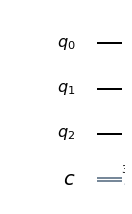

In [1]:
'''
This algorithm consists on teleporting the state of qubit 1 to qubit 3
1. Create a circuit of 3 qubits and 3 cbits
2. Invert the first qubit with circuit.x(0)
3. Entangle the other qubits by doing a hadamard and a controlled gate circuit.h(1) and circuit.cx(1, 2)
4. Now that q1 and q2 are entangled apply a cx(0, 1) and an h(0)
5. To complete the algorithm, add a circuit.cx(1, 2) and a circuit.cz(0, 2)
6. Finally measure the 2 first qubits and see the teleportation of data happen right before your eyes
'''

import qiskit as q
%matplotlib inline
circuit = q.QuantumCircuit(3, 3)
circuit.draw(output="mpl")

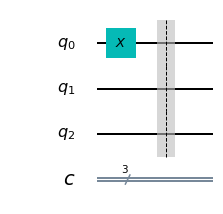

In [2]:
circuit.x(0)
circuit.barrier()
circuit.draw(output="mpl")

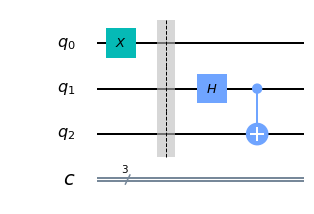

In [3]:
circuit.h(1)
circuit.cx(1, 2)
circuit.draw(output="mpl")

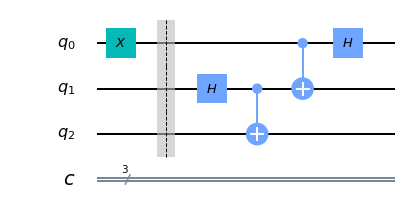

In [4]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output="mpl")

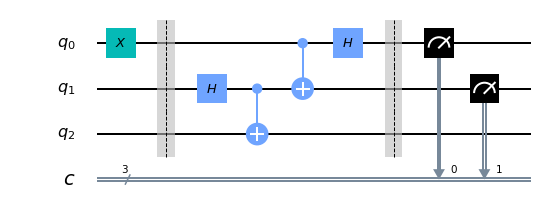

In [5]:
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.draw(output="mpl")

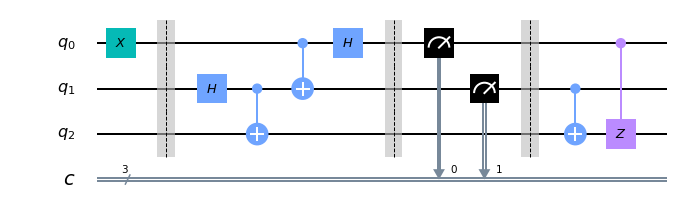

In [6]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output="mpl")

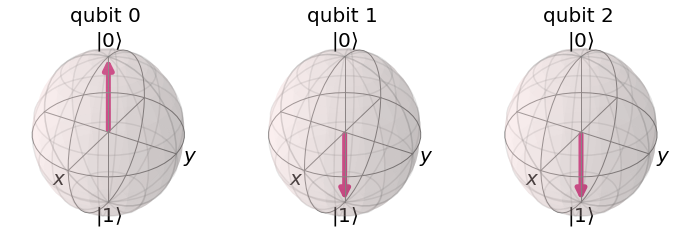

In [11]:
from qiskit.tools.visualization import plot_bloch_multivector
simulator = q.Aer.get_backend('statevector_simulator')
statevector = q.execute(circuit, backend=simulator, shots=1024).result().get_statevector()
plot_bloch_multivector(statevector)

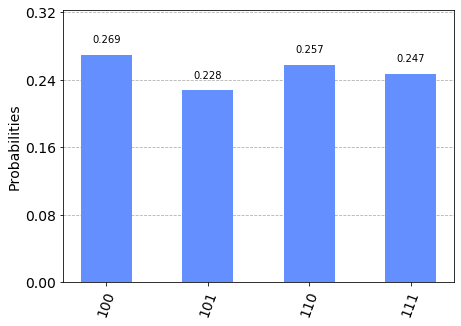

In [12]:
from qiskit.tools.visualization import plot_histogram
circuit.measure(2, 2)
simulator = q.Aer.get_backend('qasm_simulator')
counts = q.execute(circuit, backend=simulator, shots=1024).result().get_counts()
plot_histogram(counts)